In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="lBeRX0ddTHzL4Dk8rJ1l")
project = rf.workspace("dlc-ai").project("goals-g8wao")
dataset = project.version(4).download("coco-segmentation")

loading Roboflow workspace...
loading Roboflow project...

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Extracting Dataset Version Zip to goals-4 in coco-segmentation:: 100%|██████████████| 548/548 [00:01<00:00, 519.43it/s]


In [2]:
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


In [3]:
dataDir=Path('C:\\Users\\viers\\OneDrive\\Bureaublad\\MCT\\sem4\\IndustryProject\\IndustryProject\\SegmentationUnet\\goals-4\\train')
annFile = Path('C:\\Users\\viers\\OneDrive\\Bureaublad\\MCT\\sem4\\IndustryProject\\IndustryProject\\SegmentationUnet\\goals-4\\train\\_annotations.coco.json')
coco = COCO(annFile)
catIds = coco.getCatIds(catNms=['Goal']) 
imgIdsGoal = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds()
imgsGoal = coco.loadImgs(imgIdsGoal)
imgs = coco.loadImgs(imgIds)
print("Number of images containing goal:", len(imgIdsGoal))
print("Number of images",len(imgIds))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Number of images containing goal: 544
Number of images 544


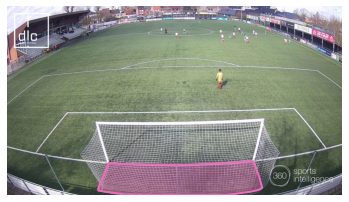

In [5]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(str(dataDir)+"\\"+str(img['file_name']))/255.0

plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)


1080
1920


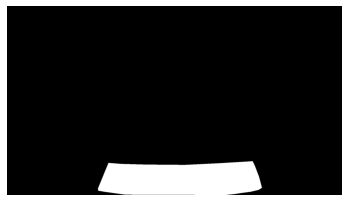

In [6]:
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

mask = np.zeros((img['height'],img['width']))
print(img['height'])
print(img['width'])
for i in range(len(anns)):
    className = 'Goal'
    mask = np.maximum(coco.annToMask(anns[0])*1, mask)
plt.axis('off')
plt.imshow(mask,cmap='gray')


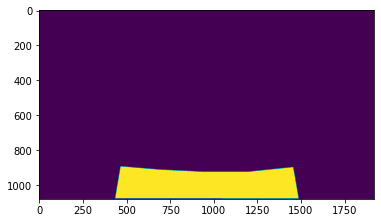

In [8]:
import cv2


for img in imgs:
    mask = np.zeros((img['height'],img['width']))
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    for i in range(len(anns)):
        frame = coco.annToMask(anns[0])*1
        frame_normed = 255 * (frame - frame.min()) / (frame.max() - frame.min())
        frame_normed = np.array(frame_normed, int)
        plt.imshow(coco.annToMask(anns[0])*1)
        if not cv2.imwrite(f"{dataDir}\\masks\\{img['file_name']}", frame_normed):
            raise Exception("Could not write image")

In [9]:
from PIL import Image
from skimage import data, io, filters
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets


def toTif(dirName):
    dataDir = f'C:\\Users\\viers\\OneDrive\\Bureaublad\\MCT\\sem4\\IndustryProject\\IndustryProject\\SegmentationUnet\\goals-4\\{dirName}'
    annFile = f"{dataDir}\\_annotations.coco.json"
    coco = COCO(annFile)
    imgIds = coco.getImgIds()
    imgs = coco.loadImgs(imgIds)
    pics = []
    
    for img in imgs:
        pics.append(img['file_name'])

    for i in range(0,len(imgIds)):
        path=pics[i]
        img= io.imread(f"{dataDir}\\"+path)

        path=str(i)+'.tif'
        io.imsave(f"{dataDir}\\"+path,img)
        
    for i in range(0,len(imgIds)):
        path=pics[i]
        img= io.imread(f"{dataDir}\\masks\\"+path)
        path=str(i)+'.tif'
        io.imsave(f"{dataDir}\\masks\\"+path,img)


toTif("train")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [22]:
#create black mask
img = np.zeros((1080,1920,3), np.uint8)
io.imsave(f"{dataDir}\\masks\\black.tif",img)



C:\Users\viers\AppData\Local\Temp\ipykernel_4412\2815463705.py:3: UserWarning: C:\Users\viers\OneDrive\Bureaublad\MCT\sem4\IndustryProject\IndustryProject\SegmentationUnet\goals-2\train\masks\black.tif is a low contrast image
  io.imsave(f"{dataDir}\\masks\\black.tif",img)
